/Users/caio/dev/motorlab/.mlab/lib/python3.13/site-packages/torch/optim/lr_scheduler.py:182: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


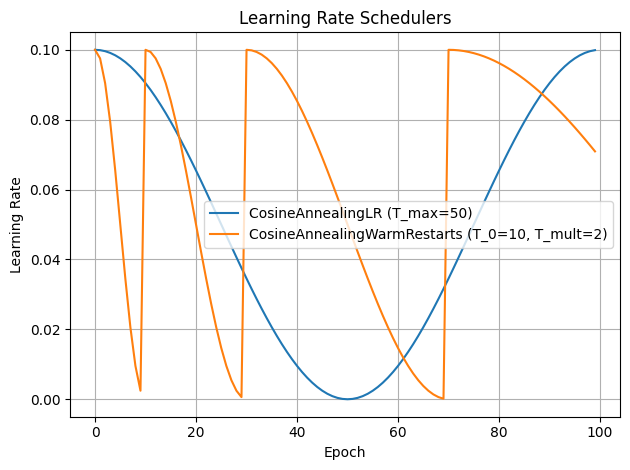

In [1]:
import torch
import matplotlib.pyplot as plt

# Dummy model
model = torch.nn.Linear(1, 1)

# Optimizers
opt1 = torch.optim.SGD(model.parameters(), lr=0.1)
opt2 = torch.optim.SGD(model.parameters(), lr=0.1)

# Schedulers
sched1 = torch.optim.lr_scheduler.CosineAnnealingLR(opt1, T_max=50)
sched2 = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
    opt2, T_0=10, T_mult=2
)

lrs1 = []
lrs2 = []
epochs = 100

for epoch in range(epochs):
    lrs1.append(opt1.param_groups[0]["lr"])
    sched1.step()

    lrs2.append(opt2.param_groups[0]["lr"])
    sched2.step()

plt.plot(range(epochs), lrs1, label="CosineAnnealingLR (T_max=50)")
plt.plot(
    range(epochs), lrs2, label="CosineAnnealingWarmRestarts (T_0=10, T_mult=2)"
)
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Schedulers")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
